In [1]:
# cubic regression using gradient descent with matrices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/cubic_reg.xlsx')

x_train = data['x'].values
y_train = data['y'].values

In [2]:
# create matrix of inputs
x0 = np.ones((len(x_train), 1))
x1 = x_train.reshape(-1, 1)
x2 = (x_train**2).reshape(-1, 1)
x3 = (x_train**3).reshape(-1, 1)
X = np.concatenate((x0, x1, x2, x3), axis=1)

# create vector of answers
y = y_train.reshape(-1, 1)

In [3]:
theta = np.zeros((X.shape[1], 1))
a = 0.01
m = len(x_train)

for _ in range(2000):
    # X @ theta are the predictions of y
    # (X @ theta - y) are the errors
    # X.T @ (X @ theta - y) sums the errors for each theta
    # (a / m) is learning rate (slow down the process)
    theta = theta - (a / m) * X.T @ (X @ theta - y)

theta.T

array([[ 1.38248582,  2.05965851,  1.94574835, -0.79505806]])

In [4]:
# print equation
print('y = %.2f + %.2fx + %.2fx^2 + %.2fx^3' % (theta[0], theta[1], theta[2], theta[3]))

y = 1.38 + 2.06x + 1.95x^2 + -0.80x^3


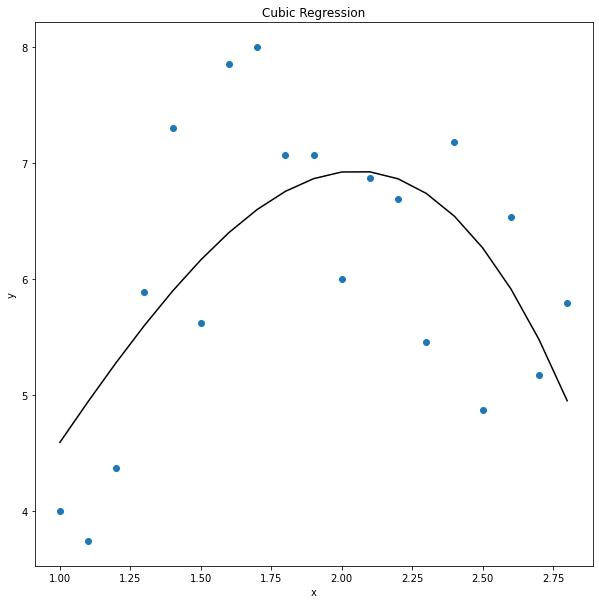

In [5]:
# plot results
plt.figure(figsize=(10, 10))
plt.title('Cubic Regression')
plt.xlabel('x')
plt.ylabel('y')

y_pred = theta[0] + theta[1] * x_train + theta[2] * x_train**2 + theta[3] * x_train**3
plt.plot(x_train, y_pred, 'k-')
plt.plot(x_train, y_train, 'o')

plt.show()